# Dragon Real Estate-Price Predictator

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285846,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705856,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.220109,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.312044,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.393376,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.090848,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.303336,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.220109,0.312044,-0.393376,0.090848,-0.303336,1.000000,-0.240021,0.206554,-0.211459,-0.293806,-0.356016,0.128960,-0.615205,0.695849
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240021,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.206554,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.211459,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.293806,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
%matplotlib inline

In [9]:
#for ploting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

# #Train-Test Splitting

In [10]:
#for learning purpose
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]    
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set, test_set =split_train_test(housing,0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.350440,15.838235,10.491373,0.068627,0.543921,6.417020,69.094118,3.866496,9.00000,396.225490,18.275490,369.180294,12.058333,23.336275
std,9.912946,27.851548,6.980691,0.254068,0.113634,0.756153,27.035103,2.037107,8.49228,169.920419,2.313132,73.369571,6.919951,9.310952
min,0.010960,0.000000,0.460000,0.000000,0.389000,4.368000,7.800000,1.316300,1.00000,188.000000,12.600000,2.520000,2.970000,6.300000
25%,0.053327,0.000000,4.995000,0.000000,0.447250,5.952000,45.850000,2.133675,4.00000,270.000000,16.800000,380.845000,6.415000,18.600000
50%,0.179710,0.000000,7.760000,0.000000,0.515000,6.315000,78.050000,3.324600,5.00000,307.000000,19.050000,393.740000,10.380000,21.650000
75%,2.410110,21.000000,18.100000,0.000000,0.614000,6.854000,91.900000,5.468950,8.00000,616.750000,20.200000,396.900000,16.770000,26.400000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,8.696600,24.00000,711.000000,21.200000,396.900000,30.630000,50.000000


In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
# 376/28

In [19]:
# 95/7

In [20]:
housing = strat_train_set.copy()

# Lokking For Correlation

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.661827
B          0.343406
ZN         0.330037
DIS        0.233371
CHAS       0.215265
RAD       -0.359236
AGE       -0.379242
CRIM      -0.396734
NOX       -0.422040
TAX       -0.438653
INDUS     -0.448432
PTRATIO   -0.488083
LSTAT     -0.735257
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

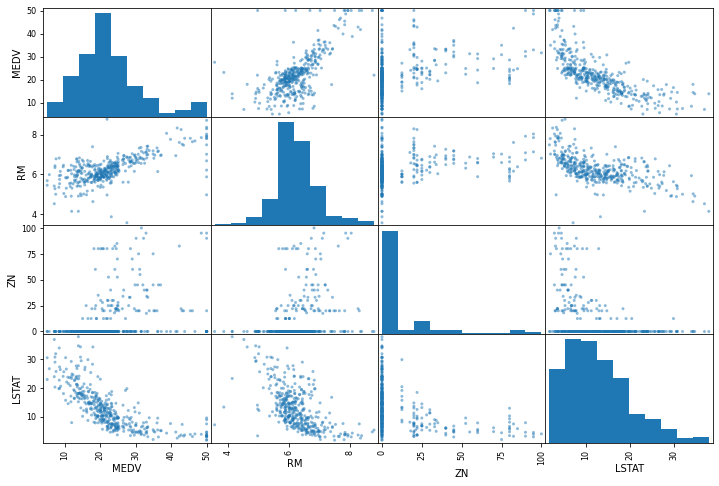

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize =(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

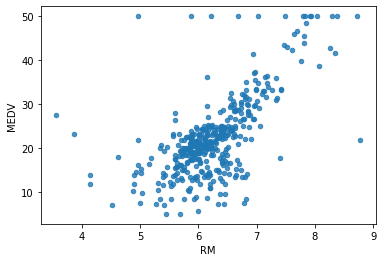

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [24]:
# housing.plot(kind="scatter",x="LSTAT",y="MEDV",alpha=0.8)

In [25]:
# housing.plot(kind="scatter",x="LSTAT",y="RM",alpha=0.8)

# Trying out ATTRIBUTES COMBINATION

In [26]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [27]:
housing["TAXRM"]

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.661827
B          0.343406
ZN         0.330037
DIS        0.233371
CHAS       0.215265
RAD       -0.359236
AGE       -0.379242
CRIM      -0.396734
NOX       -0.422040
TAX       -0.438653
INDUS     -0.448432
PTRATIO   -0.488083
TAXRM     -0.507607
LSTAT     -0.735257
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

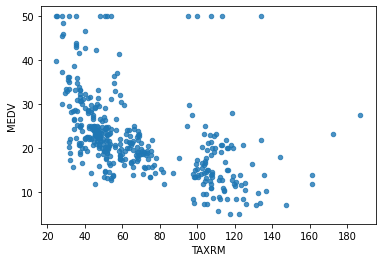

In [30]:
 housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [31]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## missing attributes

In [32]:
# To take a missing attributes,you have three option:
#     1. Get rid of the missing data points
#     2. Get rid of the all atribute
#     3. Set the value to some value(0,mean,median)

In [33]:
a = housing.dropna(subset=["RM"])#option 1
a.shape
# Note that their is no RM missing data points and also note That and the orignal dataframe will remain unchanged

(400, 13)

In [34]:
# a

In [35]:
housing.drop("RM",axis=1).shape#option2
# Note that their is no RM column and also note That and the orignal dataframe will remain unchanged

(404, 12)

In [36]:
median=housing["RM"].median() # Compute median for option 3

In [37]:
housing["RM"].fillna(median)

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [38]:
housing.shape

(404, 13)

In [39]:
housing.describe()# before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000
mean,3.679946,10.233911,11.299728,0.069307,0.557415,6.252725,68.443812,3.777002,9.688119,411.269802,18.500990,353.51651,12.803218
std,8.250041,21.928354,6.828744,0.254290,0.116418,0.689635,28.454220,2.124765,8.765586,168.262199,2.126507,95.10835,7.196413
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.32000,1.730000
25%,0.088282,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.23750,7.362500
50%,0.280140,0.000000,9.900000,0.000000,0.538000,6.175000,77.150000,3.167500,5.000000,335.000000,19.050000,390.94000,11.490000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.15750,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.90000,37.970000


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([2.8014e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1750e+00, 7.7150e+01, 3.1675e+00, 5.0000e+00, 3.3500e+02,
       1.9050e+01, 3.9094e+02, 1.1490e+01])

In [42]:
x = imputer.transform(housing)

In [43]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [44]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000
mean,3.679946,10.233911,11.299728,0.069307,0.557415,6.251955,68.443812,3.777002,9.688119,411.269802,18.500990,353.51651,12.803218
std,8.250041,21.928354,6.828744,0.254290,0.116418,0.686248,28.454220,2.124765,8.765586,168.262199,2.126507,95.10835,7.196413
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.32000,1.730000
25%,0.088282,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.23750,7.362500
50%,0.280140,0.000000,9.900000,0.000000,0.538000,6.175000,77.150000,3.167500,5.000000,335.000000,19.050000,390.94000,11.490000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.597250,94.600000,5.104475,24.000000,666.000000,20.200000,396.15750,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.90000,37.970000


# Scikit_learn Design

 Primarily,three types of objects
 1.Estimators-It estimates some parameter based on a dataset. Eg .Importer, It has a fit method and Transform method.
 fit method - Fits the data sets and calcultes the internal parameters

 2.Transformers - transform method take input and returns output based on the learnings from fit ().It also has convience 
 function called fit_transform(),Which fits and then transforms.

 3.Predictors - linearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives 
score() function which will evaluate the predictions.

# Feature Scaling

In [45]:
# # Primarlly , two types of feature Scalling methods:
#     1.Min-max scalling (Normalisation)
#        (value-min)/(max-min)
#         sklearn provides a class called MinMaxScaler for this
#     2.Standardization
#          (value-mean)/std
#          sklearn provides a class called Standard Scaler for this

# Creating a pipline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
#     .....add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [47]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for dragon Real Estates

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model= LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [50]:
some_data = housing.iloc[:5]

In [51]:
some_labels = housing_labels.iloc[:5]

In [52]:
prepared_data = my_pipeline.transform(some_data)

In [53]:
model.predict(prepared_data)

array([20.185, 27.504, 12.498, 20.925, 21.944])

In [54]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# Evaluating the model

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [56]:
rmse

1.1938629486247625

# Using better evaluation technique-Cross validation

In [57]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [58]:
rmse_scores

array([3.34795627, 2.64571136, 5.18653804, 2.76200373, 2.69434042,
       2.39231785, 3.00434601, 3.08501886, 1.97709431, 4.39498733])

In [59]:
def print_scores(scores):
    print("Scores", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [60]:
print_scores(rmse_scores)

Scores [3.34795627 2.64571136 5.18653804 2.76200373 2.69434042 2.39231785
 3.00434601 3.08501886 1.97709431 4.39498733]
Mean:  3.1490314176311136
Standard deviation:  0.9123792716548034


# Saving The Model on test data

In [61]:
from joblib import dump, load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [62]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test) 
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

In [63]:
final_rmse

3.4274375224923093

In [64]:
prepared_data[0]

array([-0.44229893,  3.18549186, -1.1230799 , -0.27288841, -1.42263284,
       -0.54852152, -1.73629764,  2.56501119, -0.99239136, -0.572851  ,
       -0.98922541,  0.4386066 , -0.49436066])